<a href="https://colab.research.google.com/github/AdamPoi/PCVK/blob/main/PCVK_week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MODUL 10 – GLOBAL THRESHOLDING

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

In [15]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [5]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.


**Mengunakan Manual**

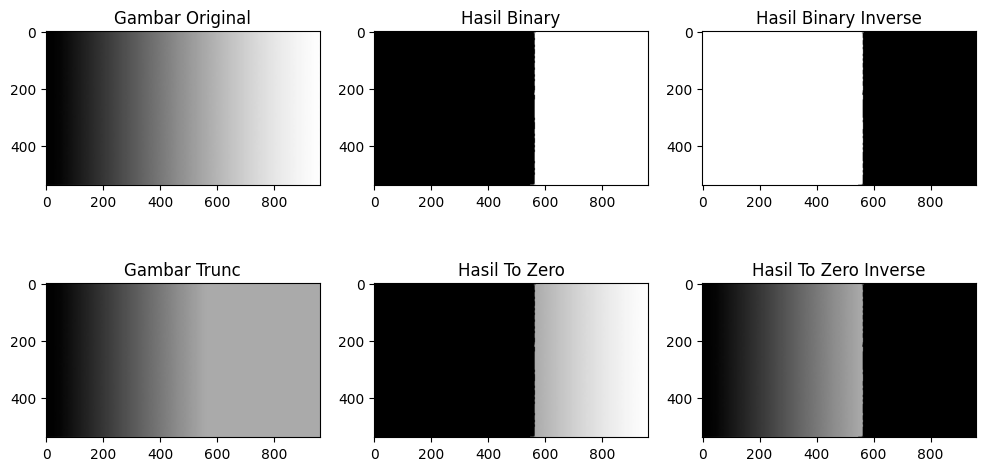

In [21]:
gradient = cv.imread('/content/drive/MyDrive/PCVK/Images/week-10/gradient.jpg')
gray = cv.cvtColor(gradient,cv.COLOR_BGR2GRAY)
thresh = 170
# Binary Thresholding
thresh_binary = gradient.copy()
thresh_binary[gray>thresh] = 255
thresh_binary[gray<=thresh] = 0

# Binary Inverse Thresholding
thresh_binary_inv = 255 - thresh_binary

# Trunc Thresholding
thresh_trunc = gradient.copy()
thresh_trunc[gray>thresh]=thresh

# Tozero Thresholding
thresh_tozero = gradient.copy()
thresh_tozero[gray<=thresh]=0

# Tozero Inverse Thresholding
thresh_tozero_inv = gradient.copy()
thresh_tozero_inv[gray>thresh]=0

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(gradient, cmap='gray'), plt.title('Gambar Original')
plt.subplot(232), plt.imshow(thresh_binary, cmap='gray'), plt.title('Hasil Binary')
plt.subplot(233), plt.imshow(thresh_binary_inv, cmap='gray'), plt.title('Hasil Binary Inverse')

plt.subplot(234), plt.imshow(thresh_trunc, cmap='gray'), plt.title('Gambar Trunc')
plt.subplot(235), plt.imshow(thresh_tozero, cmap='gray'), plt.title('Hasil To Zero')
plt.subplot(236), plt.imshow(thresh_tozero_inv, cmap='gray'), plt.title('Hasil To Zero Inverse')

plt.show()

**Menggunakan Library**

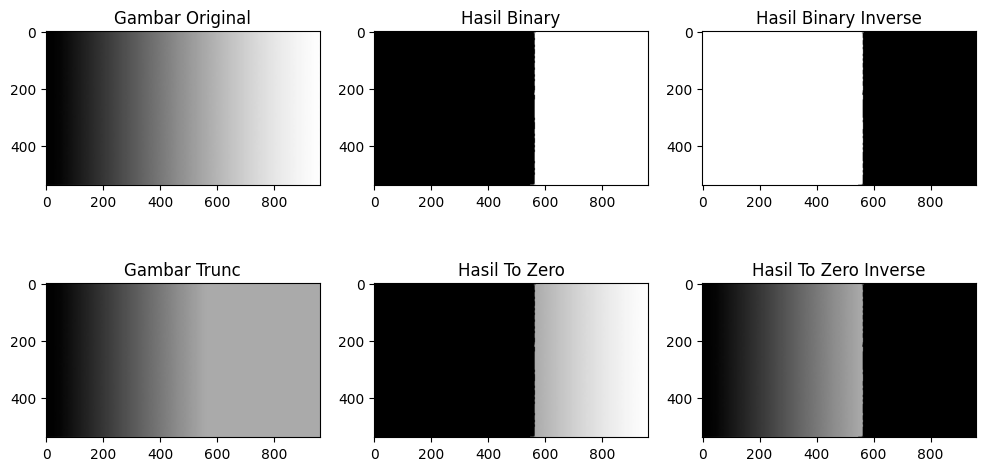

In [20]:
gradient = cv.imread('/content/drive/MyDrive/PCVK/Images/week-10/gradient.jpg')
thresh = 170

binary = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY)[1]
binary_inv = cv.threshold(gradient,thresh,255,cv.THRESH_BINARY_INV)[1]
trunc = cv.threshold(gradient,thresh,255,cv.THRESH_TRUNC)[1]
tozero = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO)[1]
tozero_inv = cv.threshold(gradient,thresh,255,cv.THRESH_TOZERO_INV)[1]

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(gradient, cmap='gray'), plt.title('Gambar Original')
plt.subplot(232), plt.imshow(binary, cmap='gray'), plt.title('Hasil Binary')
plt.subplot(233), plt.imshow(binary_inv, cmap='gray'), plt.title('Hasil Binary Inverse')

plt.subplot(234), plt.imshow(trunc, cmap='gray'), plt.title('Gambar Trunc')
plt.subplot(235), plt.imshow(tozero, cmap='gray'), plt.title('Hasil To Zero')
plt.subplot(236), plt.imshow(tozero_inv, cmap='gray'), plt.title('Hasil To Zero Inverse')

plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

In [39]:
def otsukan(img,v=0):
  hist, bins = np.histogram(img.ravel(), 256, [0, 256])
  prob = hist / np.sum(hist)
  cum_sum = np.cumsum(prob)
  cum_mean = np.cumsum(prob * np.arange(256))
  global_mean = cum_mean[-1]
  variance = np.zeros(256)
  for i in range(1, 256):
      w0 = cum_sum[i]
      w1 = 1 - w0
      if w0 == 0 or w1 == 0:
          continue
      mean0 = cum_mean[i] / w0
      mean1 = (global_mean - cum_mean[i]) / w1
      variance[i] = w0 * w1 * (mean0 - mean1) ** 2

  threshold = np.argmax(variance)
  while threshold < v:
    variance[threshold] = 0
    threshold = np.argmax(variance)
  thresh = np.zeros_like(img)
  thresh[img > threshold] = 255
  return thresh

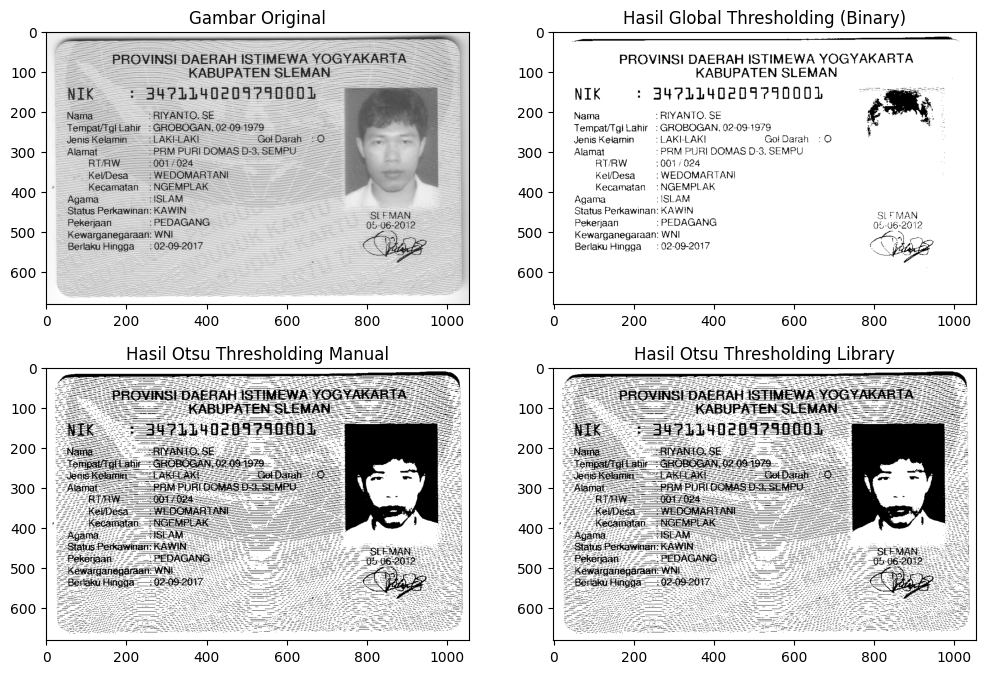

In [42]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/week-10/ktp Riyanto.png',0)
otsu_img = otsukan(ktp,167)
thresh_binary = cv.threshold(ktp,90,255,cv.THRESH_BINARY)[1]
thresh_otsu = cv.threshold(ktp,167,255,cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(thresh_binary, cmap='gray'), plt.title('Hasil Global Thresholding (Binary)')

plt.subplot(223), plt.imshow(otsu_img, cmap='gray'), plt.title('Hasil Otsu Thresholding Manual')
plt.subplot(224), plt.imshow(thresh_otsu, cmap='gray'), plt.title('Hasil Otsu Thresholding Library')

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

  a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

  b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

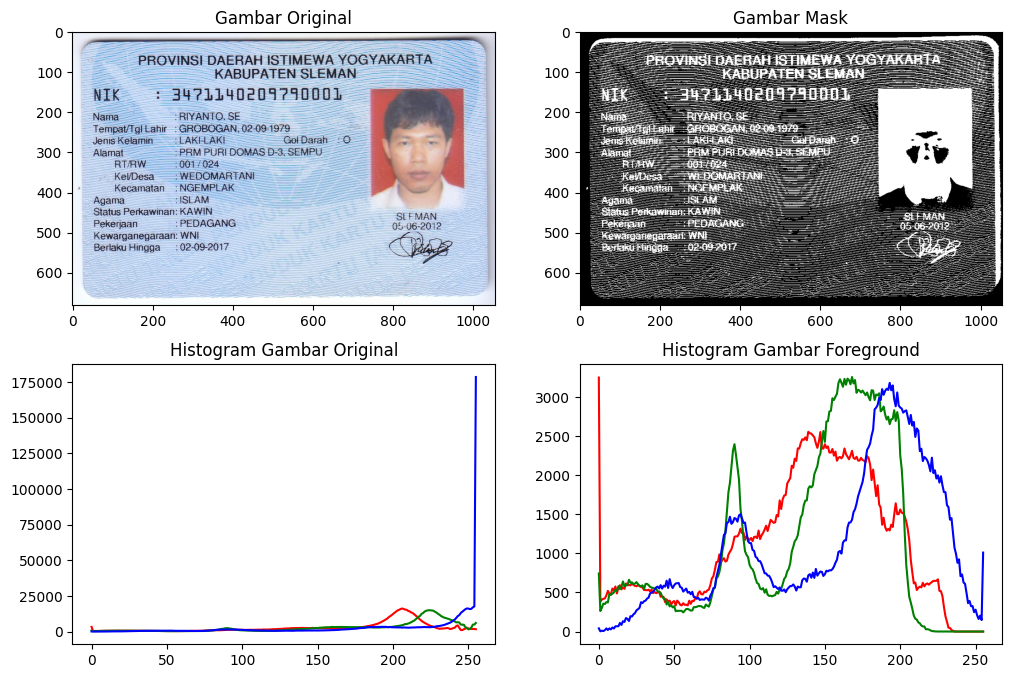

In [60]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/week-10/ktp Riyanto.png')
ktp_rgb = cv.cvtColor(ktp,cv.COLOR_BGR2RGB)
ktp_gray = cv.cvtColor(ktp,cv.COLOR_BGR2GRAY)
colors = ('r','g','b')

mask = cv.threshold(ktp_gray,200,255,cv.THRESH_BINARY_INV)[1]

plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(ktp_rgb, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(mask, cmap='gray'), plt.title('Gambar Mask')


for i,color in enumerate(colors):
  hist = cv.calcHist([ktp_rgb],[i],None, [256], [0, 256])
  plt.subplot(223), plt.plot(hist, color=color), plt.title('Histogram Gambar Original')

  hist_fg = cv.calcHist([ktp_rgb],[i],mask, [256], [0, 256])
  plt.subplot(224), plt.plot(hist_fg, color=color), plt.title('Histogram Gambar Foreground')

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

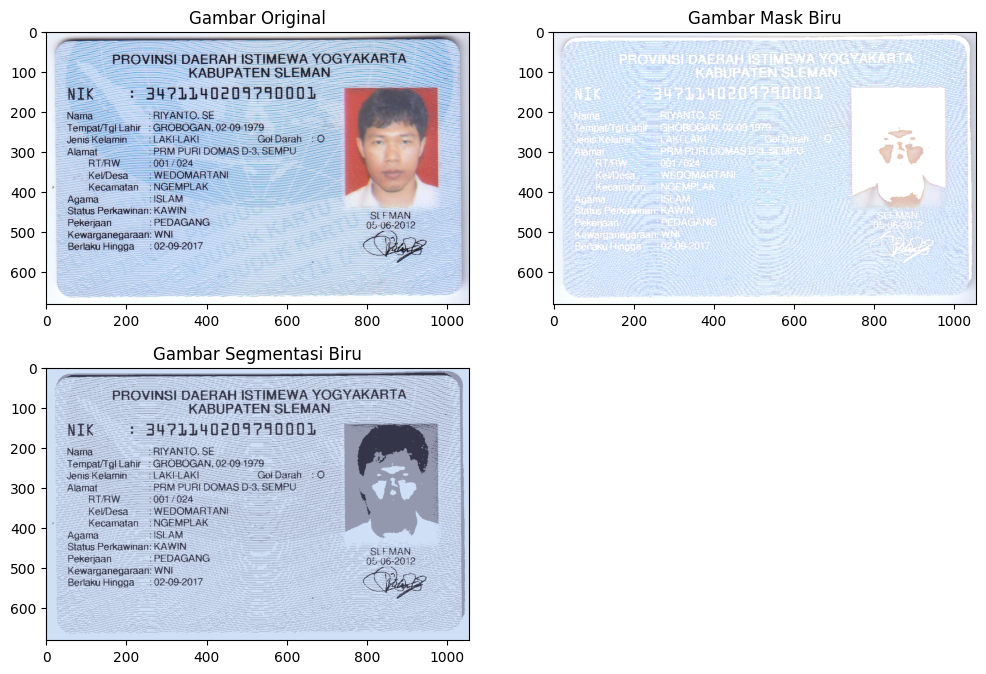

In [123]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/week-10/ktp Riyanto.png')
ktp_rgb = cv.cvtColor(ktp,cv.COLOR_BGR2RGB)

pixels = ktp_rgb.reshape((-1, 3))
pixels = np.float32(pixels)


criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,  100, 0.2)
k = 3
_, labels, (centers) = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

mask = np.copy(ktp_rgb).reshape((-1, 3))
mask[labels != 2] = [255, 255, 255]
mask = mask.reshape(ktp_rgb.shape)

segmented = centers[labels].reshape(ktp_rgb.shape)

plt.figure(figsize=(12, 8))
plt.subplot(221), plt.imshow(ktp_rgb, cmap='gray'), plt.title('Gambar Original')
plt.subplot(222), plt.imshow(mask, cmap='gray'), plt.title('Gambar Mask Biru')
plt.subplot(223), plt.imshow(segmented, cmap='gray'), plt.title('Gambar Segmentasi Biru')

plt.show()

## Tugas Praktikum
Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang
telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7.

In [138]:
from google.colab.patches import cv2_imshow

In [124]:
import glob

ktp_images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/ktp_more/ktp*'):
   n = cv.imread(img)
   n = cv.resize(n,(700,350))
   ktp_images.append(n)

**Binary Thresholding**

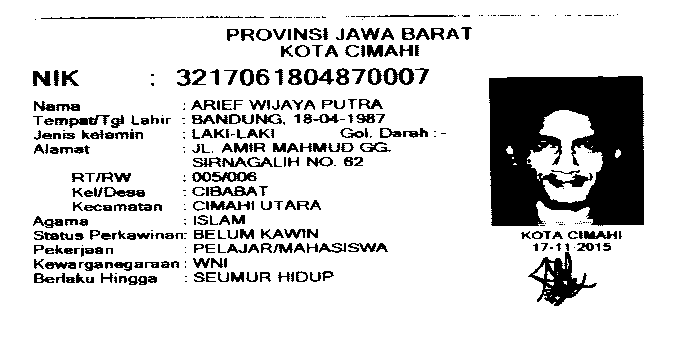

Hasil Scan Pytesseract
 

PROVINSI JAWA BARAT
KOTA CIMAHI

NIK : 3217061804870007

Nema : ARIEF WIJAYA PUTRA
TempavTg! Lahir = BANDUNG, 18-04-1987

Jeniskelamin —_ : LAKE-LAKI Gol. Darah :=
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62
RURW
Kel/Desa

: CIBABAT
Kecamatan : CIMA UTARA

KOTA CIMAHI
Pekerjaan Fo ener 17-11-2015
Kewarganegaraan :

Berlaku Hingga 2 S8lmur epue

Agama
Sots Perkawinan: SELUM KAWIN

 



In [147]:
ktp = ktp_images[0]
ktp = cv.cvtColor(ktp,cv.COLOR_RGB2GRAY)
thresholded = cv.threshold(ktp,127,255,cv.THRESH_BINARY)[1]
cv2_imshow(thresholded)

extracted_text = pytesseract.image_to_string(ktp)
print("Hasil Scan Pytesseract")
print(extracted_text)


**Gaussian Filter + Otsu Thresholding**

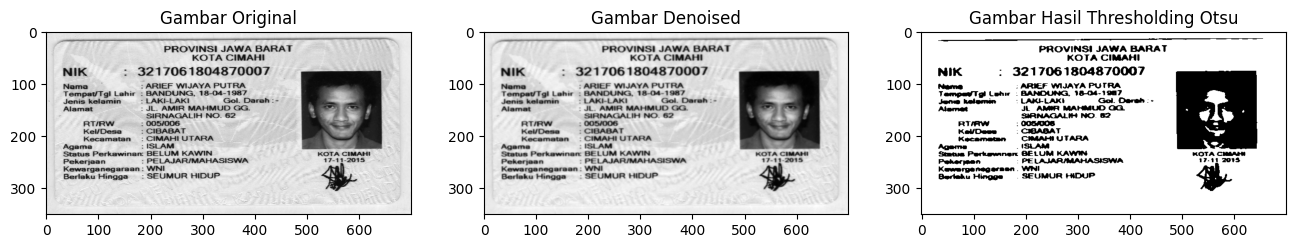

Hasil Scan Pytesseract
 

PROVINSI JAWA BARAT
KOTA CIMAHI

NIK : 3217061804870007

Nee 2 ARIEF WIJAYA PUTRA
TempavTg! Leh | BANOUNG, 18-04-1987
Sones ketemin LAKH Gol.

LAK |. Deven :-
Aleman Jt AMIR MAHMUD GG.
SWRNAGALIH NO. 62

RI

KellDess CBABAT

Kecameten — CIMAHIUTARA
Agems (SLAM
‘Statue Perkewnen BELUM KAWWN
Pokermen BELAIARMMAHASISWA
Kewarpenegersen

Bertaku Hingge tumor tspue

 



In [157]:
ktp = ktp_images[0]
ktp = cv.cvtColor(ktp,cv.COLOR_RGB2GRAY)
denoised = cv.GaussianBlur(ktp, (3, 3), 0)
thresholded = cv.threshold(denoised,127,255,cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
plt.figure(figsize=(16, 8))
plt.subplot(131), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(132), plt.imshow(denoised, cmap='gray'), plt.title('Gambar Denoised')
plt.subplot(133), plt.imshow(thresholded, cmap='gray'), plt.title('Gambar Hasil Thresholding Otsu')

plt.show()


extracted_text = pytesseract.image_to_string(thresholded)
print("Hasil Scan Pytesseract")
print(extracted_text)


**K-Means Segmentation**

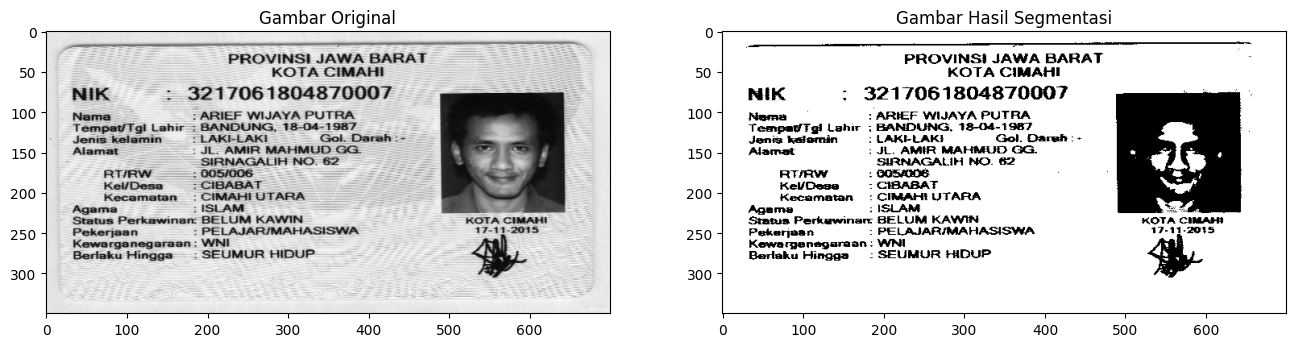

Hasil Scan Pytesseract
 

PROVINS! JAWA BARAT
KOTA CiMAHI

NIK : 3217061804870007

Nema PARIEF WIJAYA PUTRA
TempavTg! Lahir ; BANDUNG, 18-04-1987

Jens kelemin =: LAKELAK Gol. Dareh:~
Alamat JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62
RURW
Kel/Dese

1 CHBABAT
Kecamatan : CIMAHI UTARA

KOTA CIMARH
Pekerjaan eS ee 17-14-2015,
Kewarganegaraan:

Berlaku Hinggs :S2llmur Hur

Agama
oii Perkawinare SELUM KAWIN

 



In [148]:
ktp = ktp_images[0]
ktp = cv.cvtColor(ktp,cv.COLOR_RGB2GRAY)
pixels = ktp.reshape((-1, 1))
pixels = np.float32(pixels)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,  100, 0.2)
k = 2
_, labels, (centers) = cv.kmeans(pixels, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()
segmented = centers[labels].reshape(ktp.shape)

plt.figure(figsize=(16, 8))
plt.subplot(121), plt.imshow(ktp, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(segmented, cmap='gray'), plt.title('Gambar Hasil Segmentasi')

plt.show()

extracted_text = pytesseract.image_to_string(segmented)
print("Hasil Scan Pytesseract")
print(extracted_text)